<a href="https://colab.research.google.com/github/shivanivadlamani/Supervised-Learning-Rossmann-Retail-Store-Prediction/blob/main/Supervised_Learning_Rossmann_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

---

## **Submitted by**  : Vadlamani Shivani 

---



**Github link** : https://github.com/shivanivadlamani/Supervised-Learning-Rossmann-Retail-Store-Prediction.git


## Problem Description

---



Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
Data Description

`Rossmann Stores Data.csv `- historical data including Sales

`store.csv` - supplemental information about the stores




## Data fields

Most of the fields are self-explanatory.

`Id` - an Id that represents a (Store, Date) duple within the set

`Store` - a unique Id for each store

`Sales` - the turnover for any given day (Dependent Variable)

`Customers` - the number of customers on a given day

`Open` - an indicator for whether the store was open: 0 = closed, 1 = open

`StateHoliday` - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

`SchoolHoliday` - indicates if the (Store, Date) was affected by the closure of public schools

`StoreType` - differentiates between 4 different store models: a, b, c, d

`Assortment` - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

`CompetitionDistance` - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

`Promo` - indicates whether a store is running a promo on that day

`Promo2` - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

`Promo2Since[Year/Week] `- describes the year and calendar week when the store started participating in Promo2

`PromoInterval` - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Importing libraries

---



In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pylab
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_theme(style="whitegrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)

#importing math
import math

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler


# For build pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# for plot decision tree
from sklearn import tree

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

# Mounting Drive and loading Dataset

---



In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rossmann_df = pd.read_csv('/content/drive/MyDrive/supervised ML project/dataset/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/supervised ML project/dataset/store.csv')

# Exploring Rossmann Dataset

---



In [ ]:
rossmann_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossmann_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
596602,863,1,2014-01-13,7117,877,1,0,0,0
555391,907,3,2014-02-19,5713,728,1,1,0,0
517377,803,2,2014-03-25,3773,364,1,0,0,0
957236,237,6,2013-02-23,3700,453,1,0,0,0
644877,78,6,2013-11-30,3840,548,1,0,0,0


In [ ]:
rossmann_df.shape

(1017209, 9)

In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
rossmann_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
rossmann_df.duplicated().sum()

0

# Exploring Store Dataset

---



In [ ]:
store_df.sample(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1088,1089,d,a,5220.0,5.0,2009.0,0,NaN,NaN,NaN
392,393,d,c,4820.0,3.0,2008.0,0,NaN,NaN,NaN
367,368,d,c,1450.0,4.0,2005.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
889,890,a,a,4450.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
66,67,a,c,410.0,2.0,2006.0,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
store_df.duplicated().sum()

0

# Looking for Null/NaN values

---



In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values in Rossmann dataset, so we are good to go..

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There multiple Nan values in columns - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values. we need to clean these data. 

# Fixing Null/NaN values
1. Competition Distance

---



In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


So, there are numerous ways we can fill the null values such as 0 , mean , mode , or median. Lets fill these with median values.

In [ ]:
#checking mean 
Check_Mean=store_df['CompetitionDistance'].mean()
Check_Mean

5404.901079136691

In [ ]:
#checking median
Check_Median=store_df['CompetitionDistance'].median()
Check_Median

2325.0

In [ ]:
#checking mode
Check_Mode=store_df['CompetitionDistance'].mode()
Check_Mode

0    250.0
Name: CompetitionDistance, dtype: float64

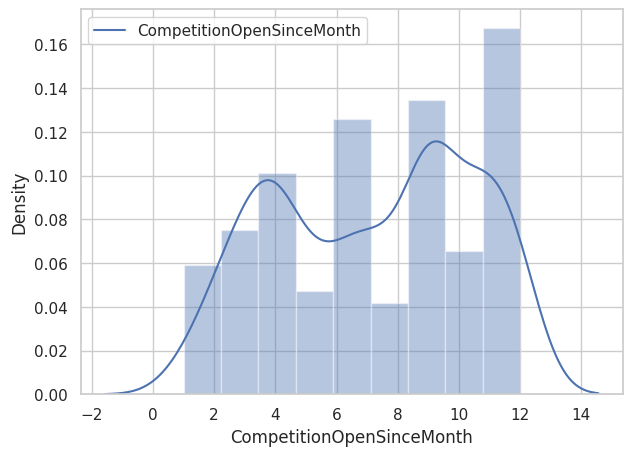

In [ ]:
# checking CompetitionOpenSinceMonth distributuion
plt.figure(figsize=(7,5))
sns.distplot(store_df['CompetitionOpenSinceMonth'],color = 'b')
plt.legend(['CompetitionOpenSinceMonth'])
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceMonth is Left Skewed

In [ ]:
## replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'

---



There is not much information about this data. As we observed from dataset that where the Promo2 has value equals to zero in NaN values in columns . Which means the store which does not want/need a promotion  have null values in promointerval , promo2sinceweek and other columns . So the best way to fill these null/NaN values will be filling them with zeros

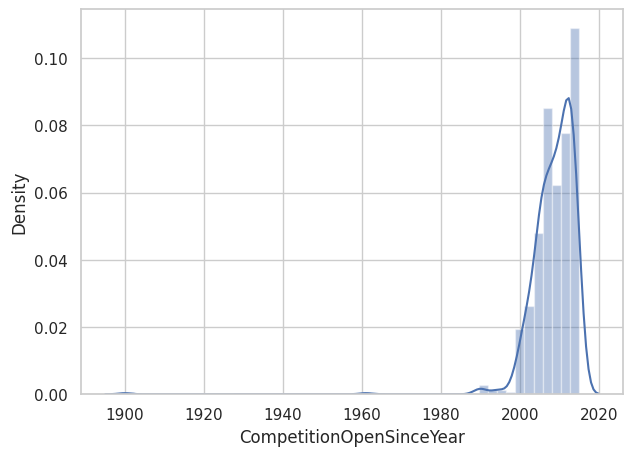

In [ ]:
# checking distribution for CompetitionOpenSinceYear
plt.figure(figsize=(7,5))
sns.distplot(store_df['CompetitionOpenSinceYear'],color='b')
plt.show()

In [ ]:
#Checking Means
mean_CompetitionOpenSinceMonth_Year=store_df[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mean()
mean_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       7.224704
CompetitionOpenSinceYear     2008.668857
dtype: float64

In [ ]:
#Checking Median
median_CompetitionOpenSinceMonth_Year=store_df[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].median()
median_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       8.0
CompetitionOpenSinceYear     2010.0
dtype: float64

In [ ]:
## replacing Nan values with mode.

new_store_df = store_df.copy()
new_store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
new_store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
new_store_df[['Promo2SinceWeek','Promo2SinceYear']]=new_store_df[['Promo2SinceWeek','Promo2SinceYear']].replace(np.nan,0)
new_store_df['PromoInterval']=new_store_df['PromoInterval'].replace(np.nan,"0")


In [ ]:
## Now checking Nan values
new_store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Merging  Rossmann_df and new_store_df datasets

Mering on `store` column as it is common in both the datasets

In [ ]:
final_df = pd.merge(rossmann_df, new_store_df, on='Store', how='left')
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
final_df.shape

(1017209, 18)

In [ ]:
# code for changing StateHoliday dtype from object to int.
final_df.loc[final_df['StateHoliday'] == '0', 'StateHoliday'] = 0
final_df.loc[final_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
final_df.loc[final_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
final_df.loc[final_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
final_df['StateHoliday'] = final_df['StateHoliday'].astype(int, copy=False)

print('levels :', final_df['StateHoliday'].unique(), '; data type :', final_df['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
final_df.loc[final_df['Assortment'] == 'a', 'Assortment'] = 0
final_df.loc[final_df['Assortment'] == 'b', 'Assortment'] = 1
final_df.loc[final_df['Assortment'] == 'c', 'Assortment'] = 2
final_df['Assortment'] = final_df['Assortment'].astype(int, copy=False)

print('levels :', final_df['Assortment'].unique(), '; data type :', final_df['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final_df.loc[final_df['StoreType'] == 'a', 'StoreType'] = 0
final_df.loc[final_df['StoreType'] == 'b', 'StoreType'] = 1
final_df.loc[final_df['StoreType'] == 'c', 'StoreType'] = 2
final_df.loc[final_df['StoreType'] == 'd', 'StoreType'] = 3
final_df['StoreType'] = final_df['StoreType'].astype(int, copy=False)

print('levels :', final_df['StoreType'].unique(), '; data type :', final_df['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'], format= '%Y-%m-%d')

In [ ]:
final_df['CompetitionOpenSinceYear']= final_df['CompetitionOpenSinceYear'].astype(int)
final_df['Promo2SinceYear']= final_df['Promo2SinceYear'].astype(int)

In [ ]:
final_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_df['Date']).month

In [ ]:
final_df['CompetitionDistance']= final_df['CompetitionDistance'].astype(int)
final_df['Promo2SinceWeek']= final_df['Promo2SinceWeek'].astype(int)

In [ ]:
final_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

In [ ]:
final_df.describe().round(2)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5422.02,5.85,1373.03,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7706.92,3.33,931.17,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,9.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,710.00,3.00,9.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2325.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


# Exploratory data analysis


---



# Store Type

---



In [ ]:
merged_df = pd.merge(rossmann_df, new_store_df, on='Store', how='left')

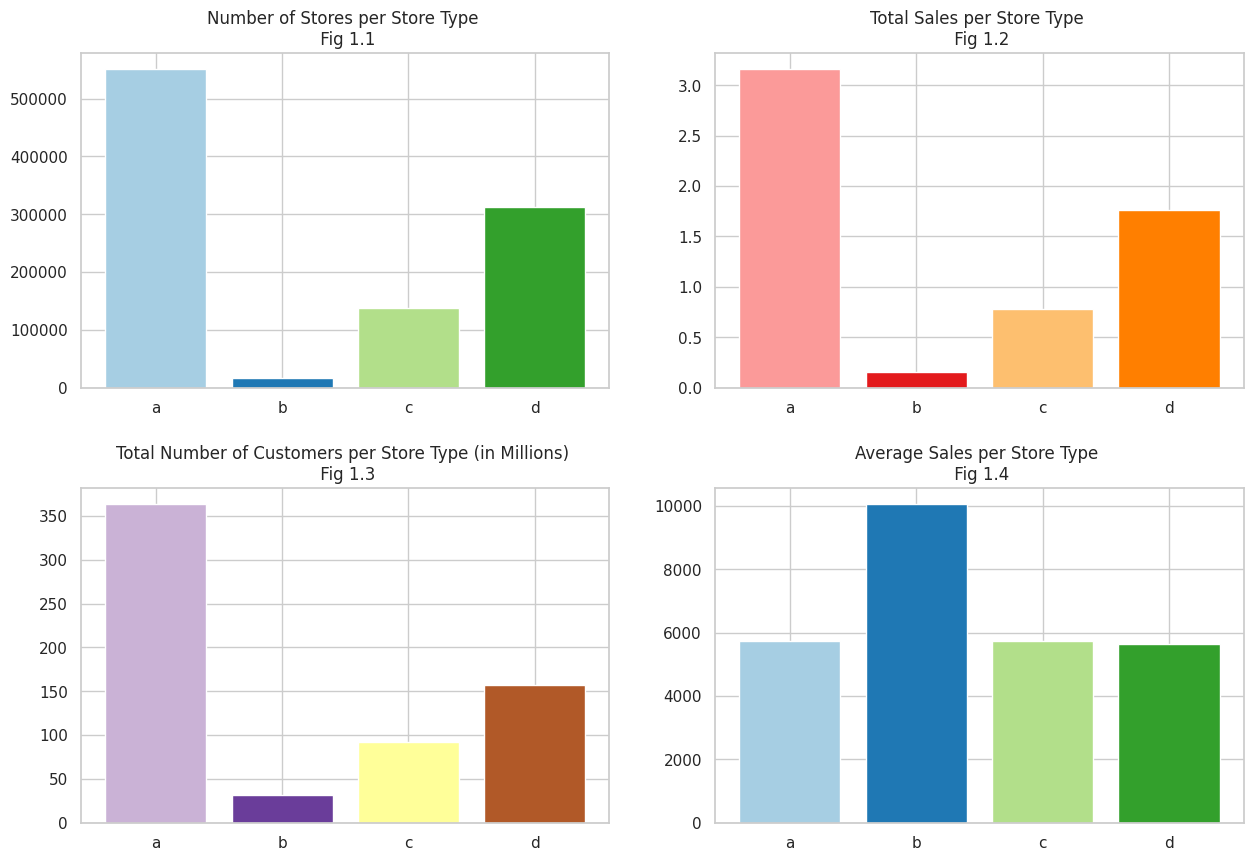

In [ ]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(15,10) )
palette = itertools.cycle(sns.color_palette("Paired"))
plt.subplots_adjust(hspace = 0.30)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")

plt.show()

In [ ]:
merged_df.groupby(["StoreType", "Assortment"]).agg(num_stores=("Assortment", "count"))


num_stores
StoreType Assortment            
a         a               346389
          c               205238
b         a                 6594
          b                 8294
          c                  942
c         a                70878
          c                65962
d         a               113584
          c               199328

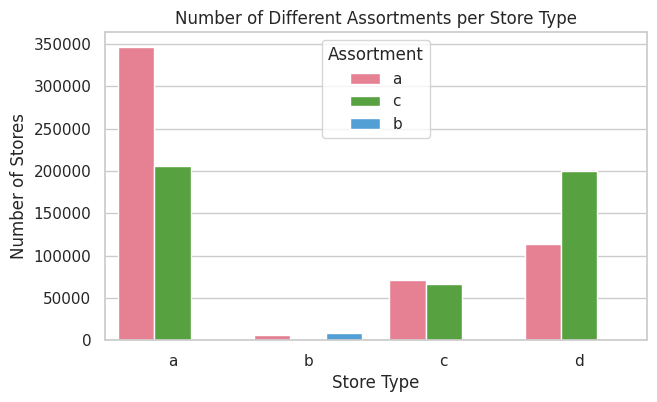

In [ ]:
counts_df = merged_df.groupby(["StoreType", "Assortment"]).agg(num_stores=("Assortment", "count")).reset_index()

fig, ax = plt.subplots()
sns.barplot(x="StoreType", y="num_stores", hue="Assortment", order=["a", "b", "c", "d"], data=counts_df, palette="husl", ax=ax)
ax.set_title("Number of Different Assortments per Store Type")
ax.set_xlabel("Store Type")
ax.set_ylabel("Number of Stores")
plt.show()



The bar plot clearly shows that the majority of stores have either the a or c assortment type, with b  being less common. It is interesting to note that StoreType d, which has the highest Sales per customer average, mostly has the c assortment type. This may be the reason for the higher average Sales per customer in this store type, as having a variety of products tends to increase customers' spending patterns.

This finding highlights the importance of offering a diverse range of products in stores, as it can lead to higher sales and revenue. By understanding the relationship between StoreType and Assortment, retailers can make informed decisions about which types of products to stock in their stores to maximize profits.



# Sales

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

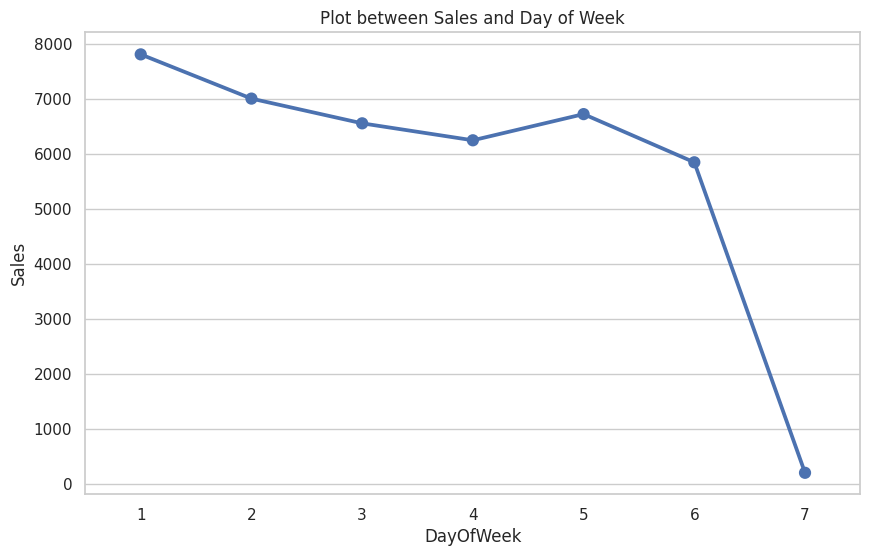

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and weekdays which gradually decreases as we approach weekends i.e. on Saturday. It also shows that sales on Sunday is almost near to zero and sunday most stores are closed as well.

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

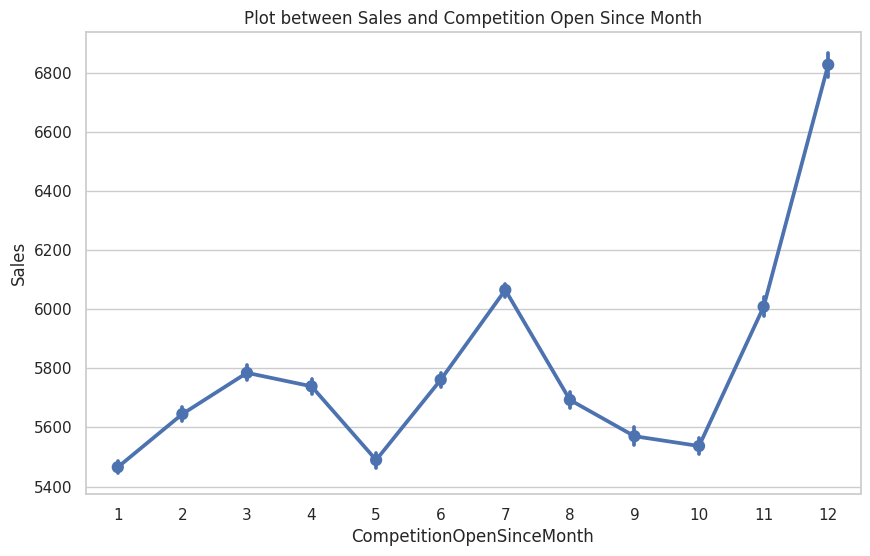

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after  november increases drastically. This is very clear that in December as it is   Christmas Eve and New year celebration sales is more compared to other months. So sales of Rossmann store is very high in December.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

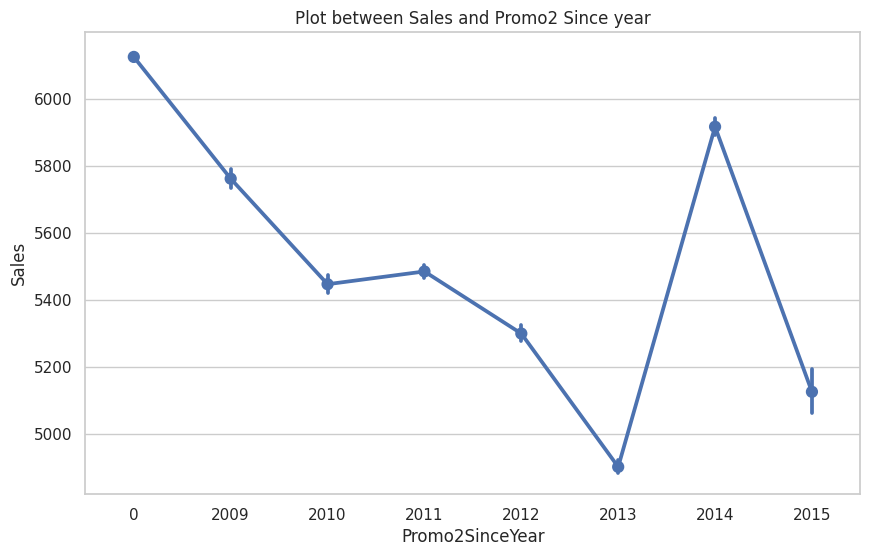

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotions. This data is available from year 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales are minimum and also in year 2012 and 2015 sales are comparitively low.

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

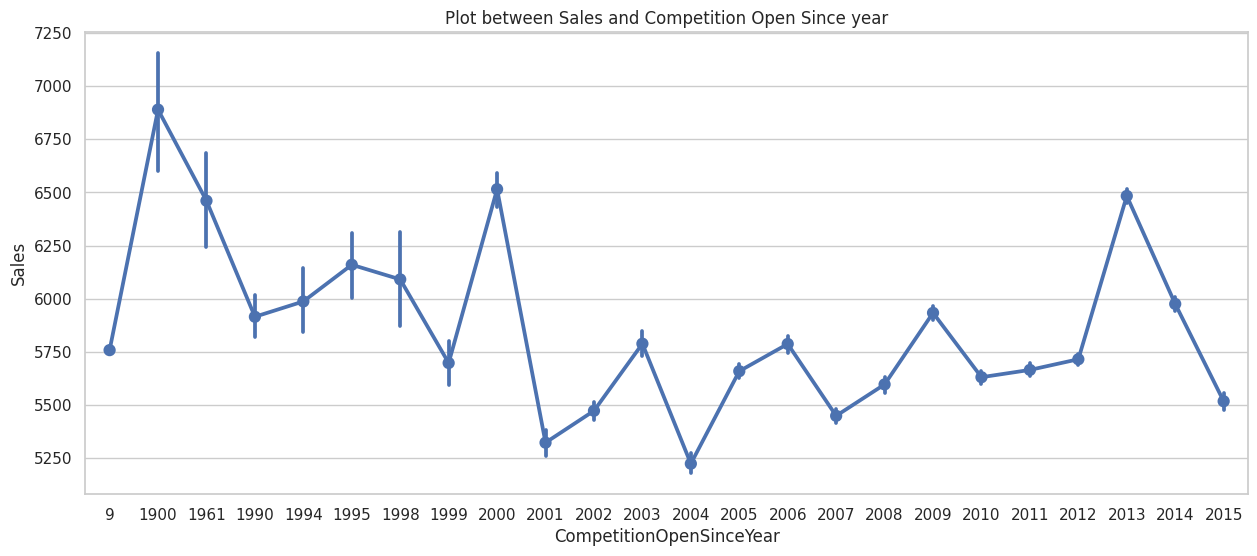

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final_df)
plt.title('Plot between Sales and Competition Open Since year')

From this Plot we can tell that Sales are high during the year 1900, as there are very few stores that were operated by Rossmann so there was less competition and sales were high. But in coming years number of stores gradually increased that means competition also increased and this leads to decreased sales .

# BoxPlot of sales between Assortment and store type

Text(0.5, 1.0, 'Boxplot for the effect of Assortment Type on sales')

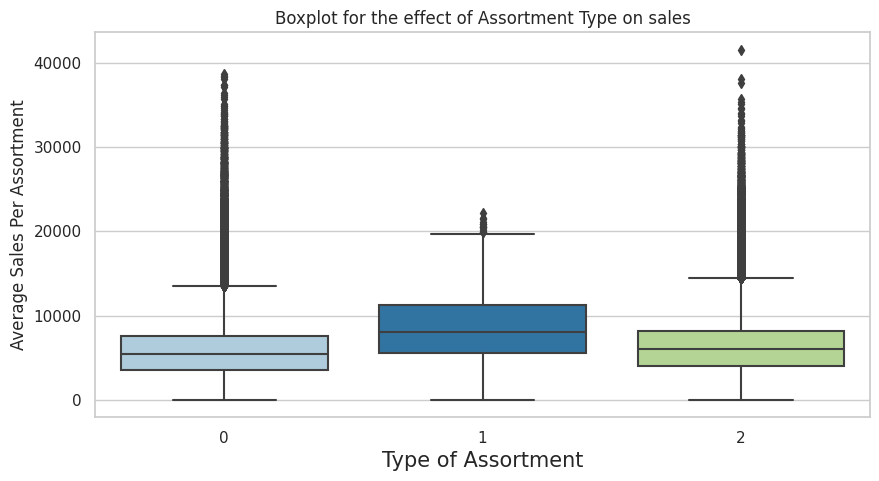

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Assortment",y="Sales",data=final_df ,palette = ("Paired"))
plt.xlabel("Type of Assortment",size=15)
plt.ylabel("Average Sales Per Assortment")
plt.title("Boxplot for the effect of Assortment Type on sales")

BoxPlot and whisker plots, are a great chart to use when showing the distribution of data points across a selected measure

We can observe that Assortment 1  have more no. of sales then other 2

Text(0.5, 1.0, 'Boxplot For Sales Values')

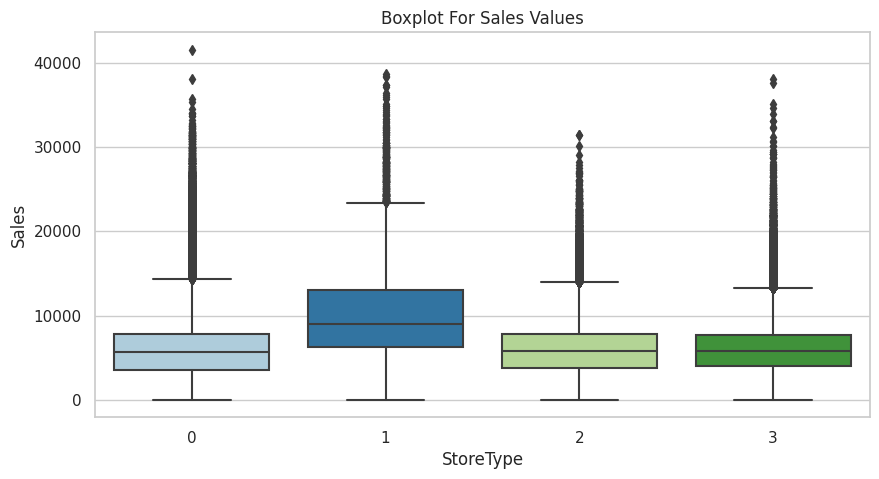

In [ ]:
plt.figure(figsize=(10, 5))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final_df ,palette = ("Paired"))
plt.title('Boxplot For Sales Values')



We can observe that store type 1 have more no. of sales then other 3


# Plot between Dayof Week and Open & promo.

Text(0.5, 1.0, 'Store Daily Open Countplot')

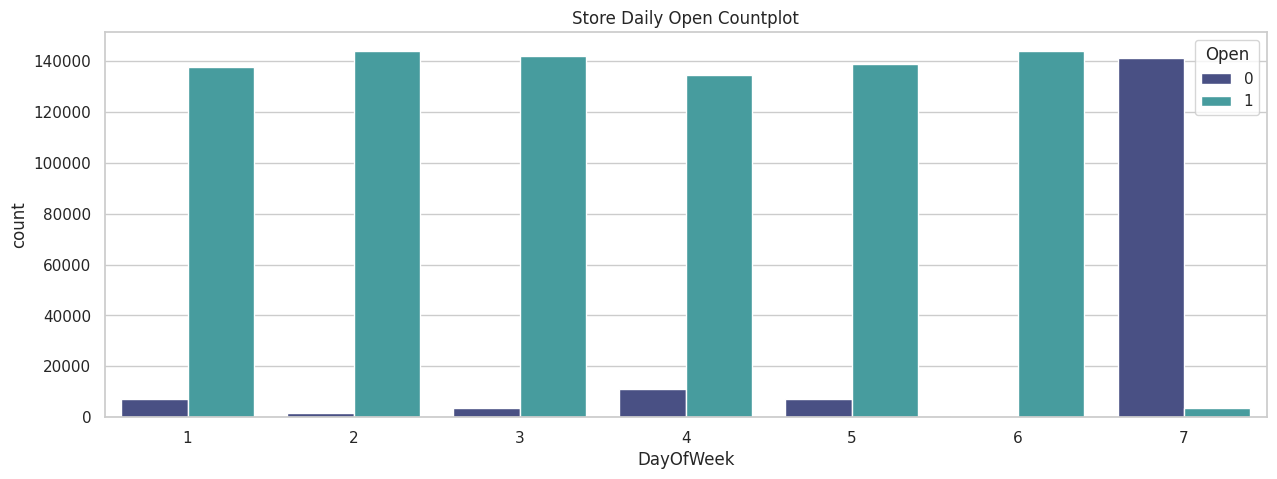

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final_df, palette="mako")
plt.title('Store Daily Open Countplot')

We can observe that most stores tend to be open on weekdays were as there are few those remain closed during weekdays due to som rennovation or other issues.
We can also observe that some store are open on weekends too while most of them are closed .

Text(0.5, 1.0, 'Store Daily Promo Countplot')

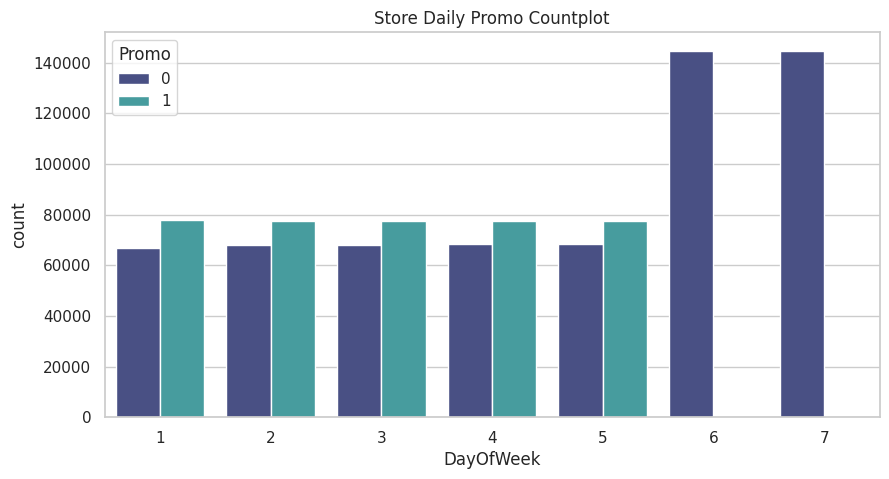

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final_df, palette="mako")
plt.title('Store Daily Promo Countplot')

# StateHoliday and SchoolHoliday
Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

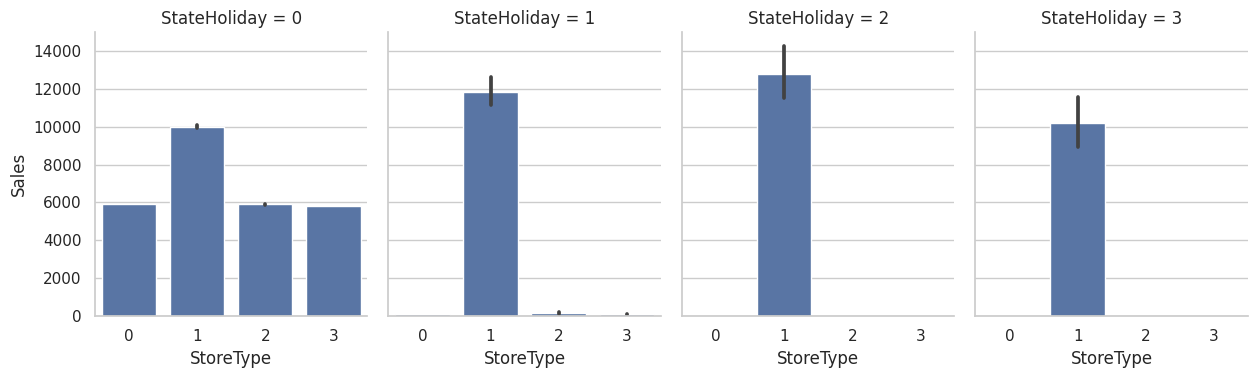

In [ ]:
g = sns.FacetGrid(final_df, col="StateHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

Store tpe 1 seems to have most sales on holidays while other stores have decent sales on public holiday

## Sales during school holiday

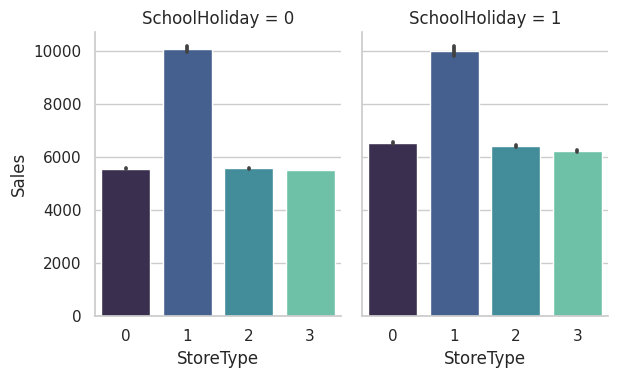

In [ ]:
g = sns.FacetGrid(final_df, col="SchoolHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales",palette="mako");
     

Upon analyzing the sales data, it was observed that store type b had the highest sales across both school holidays and weekdays, while other store types had comparatively lower sales. The bar plot clearly shows that store types 1, 2, and 4 had a slightly higher sales volume on weekends compared to weekdays.



# Promo

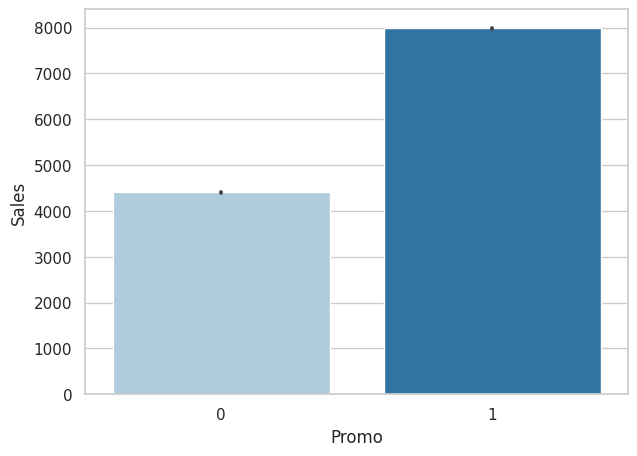

In [ ]:
plt.figure(figsize=(7, 5))
promo_sales = sns.barplot(x="Promo", y="Sales", data=final_df, palette="Paired")

Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which did not opt for promotion and 1 represents for stores who opted a promotion. 
Stores which had promotions have comparitvely higher sales than those which did not have any promotions.

<Figure size 200x200 with 0 Axes>

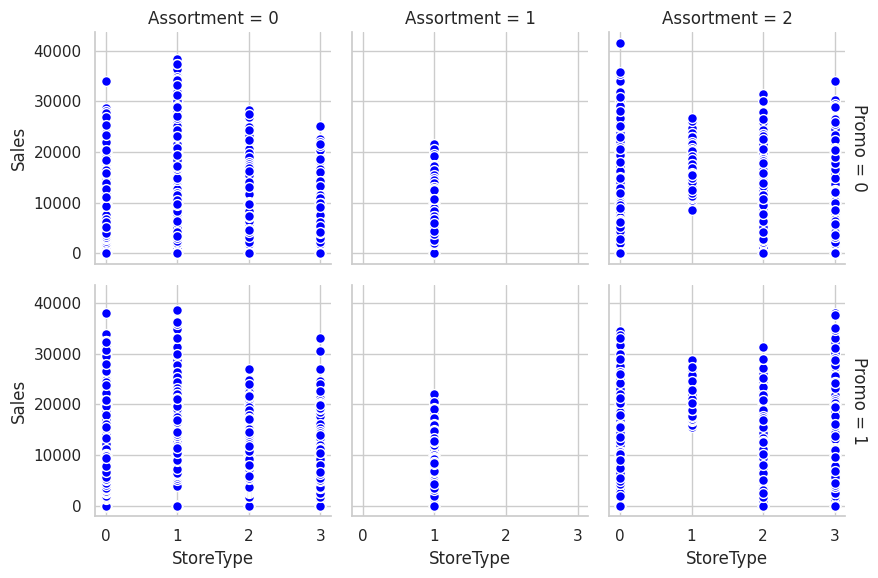

In [ ]:
plt.figure(figsize=(2, 2))
g = sns.FacetGrid(final_df, col="Assortment", row="Promo", margin_titles=True, height=3)
g.map(plt.scatter,  "StoreType","Sales", color="blue", edgecolor="white", s=50, lw=1)

Upon analyzing the relationship between different store types and assortments, some interesting patterns have emerged.

Firstly, it was observed that for assortment type '0', store type '1' had more sales when promo was applied as compared to when it was not applied. On the other hand, store types '0' and '2' had almost the same sales irrespective of whether the promo was applied or not for assortment type '0'.

Secondly, for assortment type '1', it was observed that only store type '1' had sales, and that too the same amount with or without the promo.

Finally, for assortment type '2', store types '0', '2' and '3' had more sales without the promo. Store type '2' had the same sales with or without the promo.

The above observations suggest that for basic assortment '0', applying promo can lead to higher sales, while for extended assortment '1', there is no significant difference in sales with or without the promo. However, for assortment type '2', stores can achieve higher sales without applying the promo.









## Which day of the week has maximum sales and Customers?

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

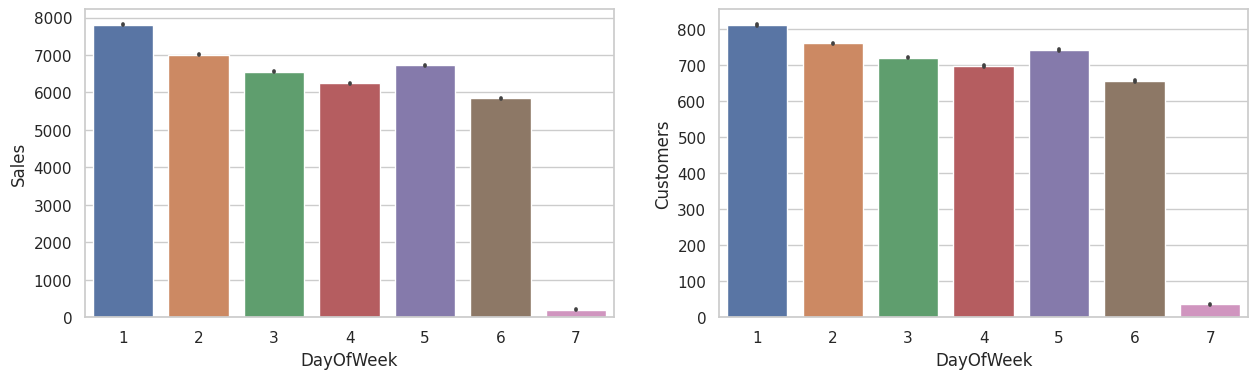

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=final_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=final_df, order=[1,2,3,4,5,6,7], ax=axis2)

Sales And Customer  are highest on Monday  and quite low  on Sunday as it is weekend

## **Conclusions on EDA:**

---



**Dataset Details:**

1.The Rossmann dataset has 1,017,209 rows and 8 columns.
The Store dataset has 1,115 rows and 10 columns.
The common column between the two datasets is 'Store'.
2.Inner join is used to merge the two datasets based on the 'Store' column.

**Replacing NaN Values:**

1.'CompetitionDistance' column in Store dataset has only 3 NaN values, which were replaced with the median value.

2.Other columns such as 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'PromoInterval' had a lot of NaN values and were replaced with 0.

**Final Dataset:**

1.After merging the two datasets and replacing NaN values, the final dataset had a shape of (1,017,209, 18).

2.Some columns such as 'StateHoliday', 'SchoolHoliday' and 'Assortment' had object values and were converted into integers with suitable values.

**Graph Analysis:**

1.The plot between sales and competition open since month showed that sales increased from November and peaked in December, possibly due to the Christmas and New Year's Eve.

2.The plot between sales and day of the week showed that sales were highest on Monday and started declining from Tuesday to Saturday, and on Sunday, sales were almost zero, probably because most stores were closed on Sundays.

3.The plot between promotion and sales showed that promotion helped in increasing sales, and this trend was also observed with customers.

4.The plot between StateHolidays and sales showed that during public holidays, sales were high, but for other holidays such as Easter and Christmas, sales were very low, possibly because most stores were closed during these holidays.

Overall, the above points summarize the key aspects of the given datasets, data cleaning, merging, and analysis based on the graphs.

# Feature Engineering

---


## Correlations

---



In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

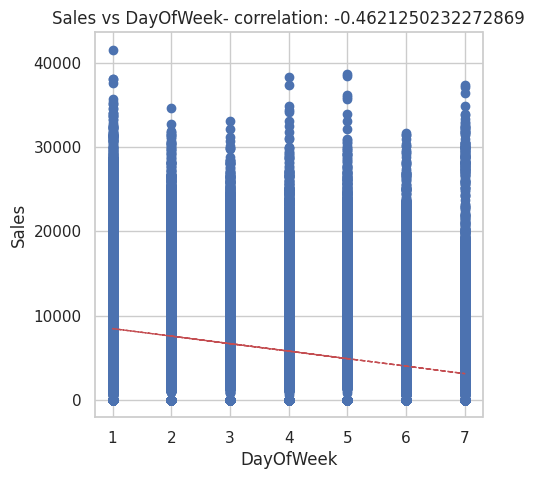

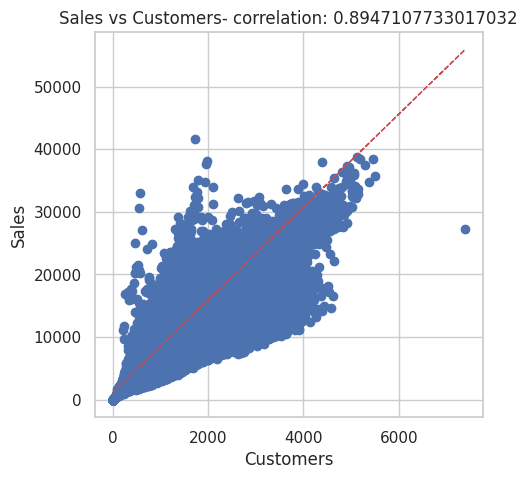

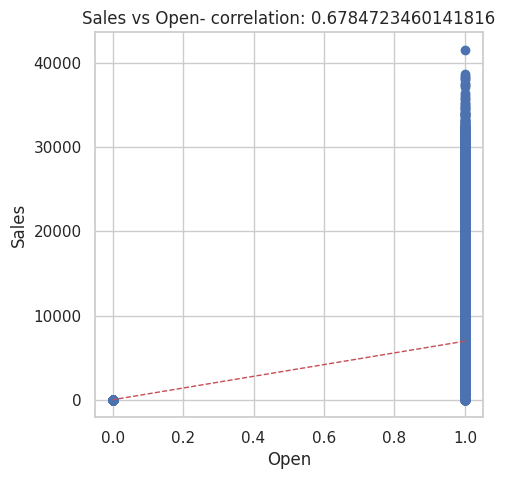

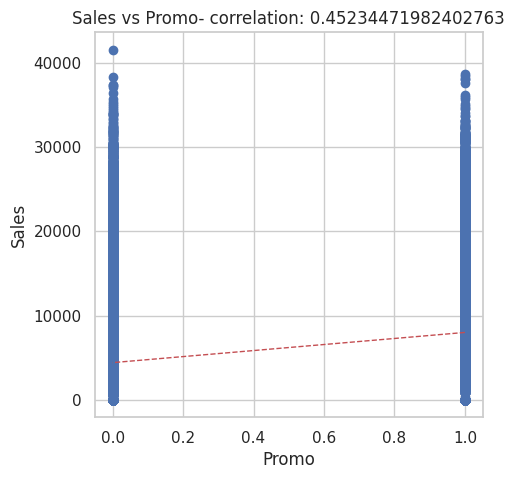

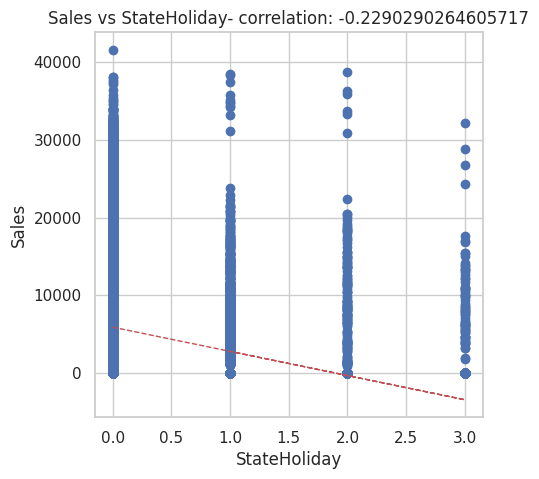

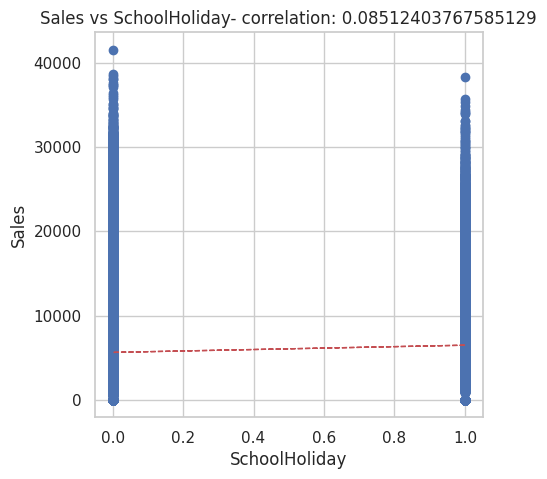

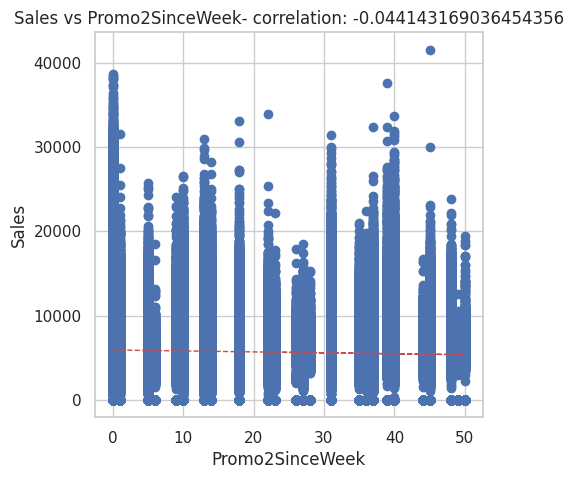

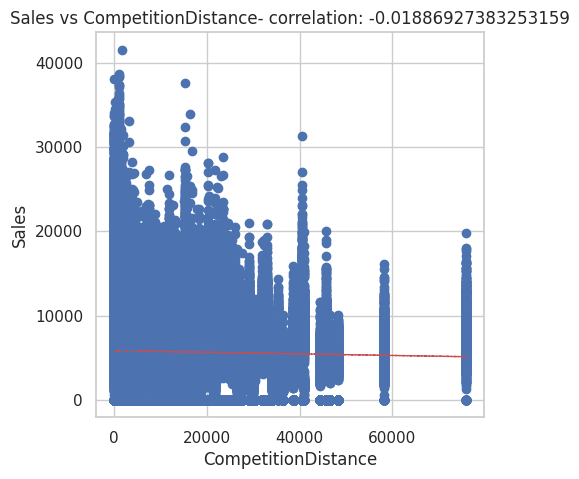

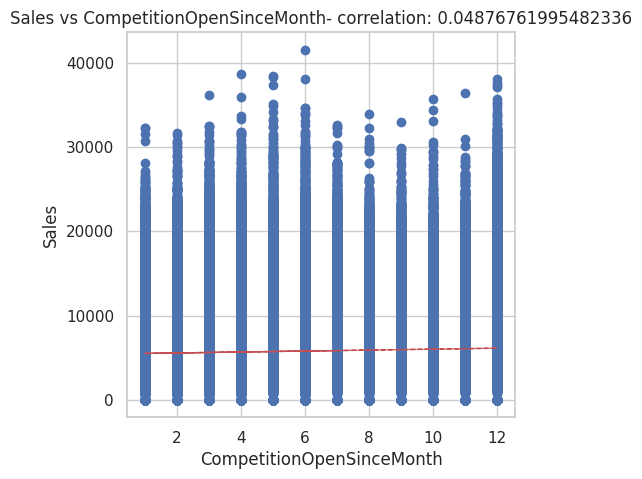

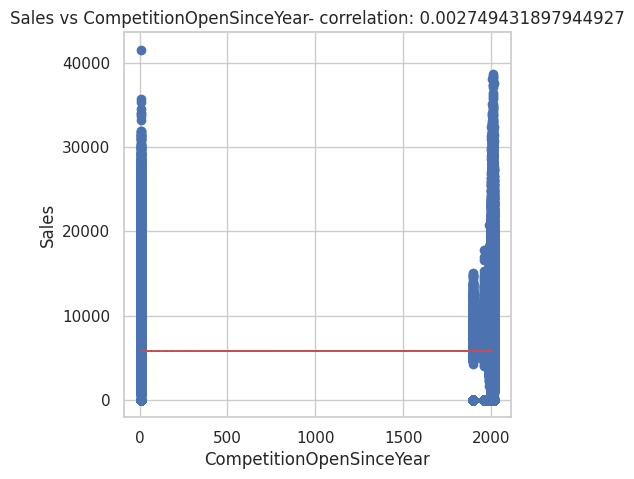

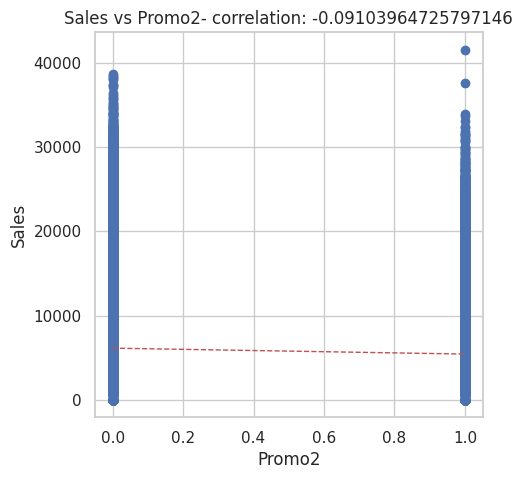

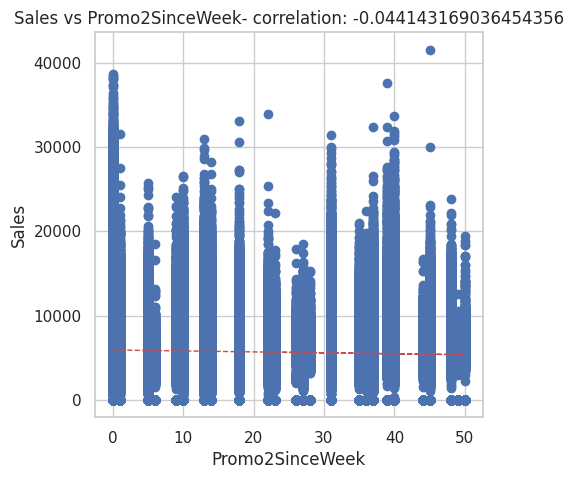

In [ ]:
# plot scatter plot with regression line and correlation coefficient for each numeric feature
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()
    feature = final_df[col]
    label = final_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final_df[col], final_df['Sales'], 1)
    y_hat = np.poly1d(z)(final_df[col])

    plt.plot(final_df[col], y_hat, "r--", lw=1)

    plt.show()


<Axes: >

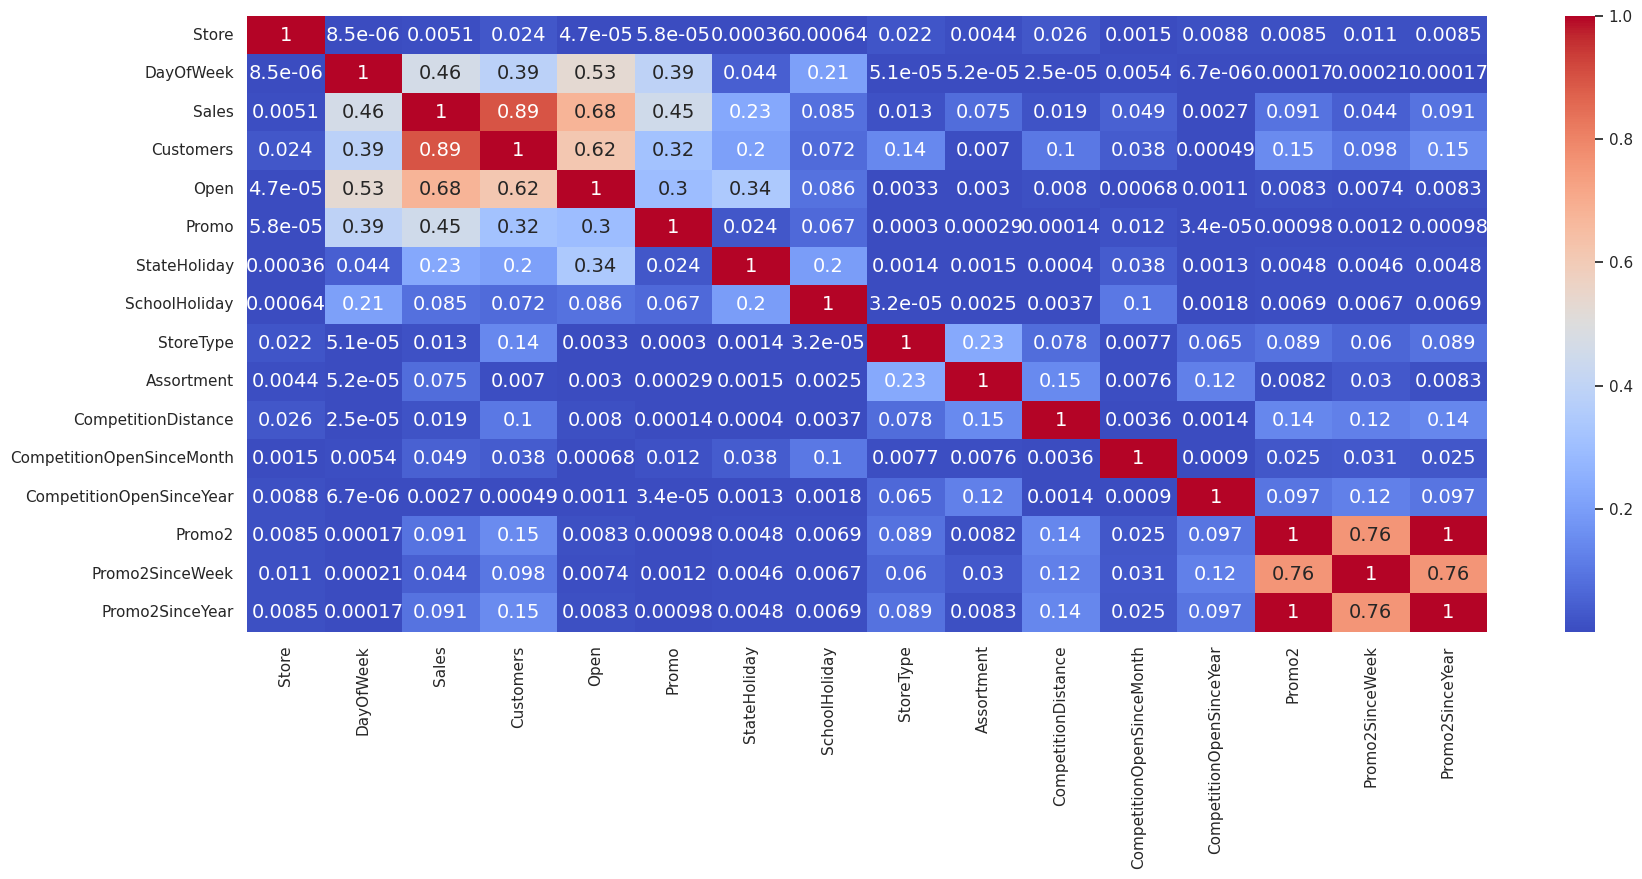

In [ ]:
 ## Correlation
plt.figure(figsize=(20,8))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Sales is highly correlated to promo2 , promo2sinceweek , and promo2sinceyear.
It is also correlated to the shops that are open, customers and wheather the store has a promotion or not.

## Multicollinearity

In [ ]:
def calc_vif(X):
    return pd.DataFrame({'variables': X.columns, 'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})


In [ ]:
numeric_features = [i for i in final_df.describe().columns if i != 'Sales']
vif_df = calc_vif(final_df[numeric_features])
vif_df


,variables,VIF
0,Store,3.699112e+00
1,DayOfWeek,4.109035e+00
2,Customers,5.237288e+00
3,Open,9.380673e+00
4,Promo,1.917307e+00
5,StateHoliday,1.188105e+00
6,SchoolHoliday,1.330854e+00
7,StoreType,1.940352e+00
8,Assortment,2.045126e+00
9,CompetitionDistance,1.591316e+00


Multicolinearity of columns like 'Promo2SinceYear' is very high so we decided to drop it

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in  ['Sales','Promo2SinceYear']]])

,variables,VIF
0,Store,3.696669
1,DayOfWeek,4.108693
2,Customers,5.236794
3,Open,9.379589
4,Promo,1.917265
5,StateHoliday,1.188105
6,SchoolHoliday,1.330838
7,StoreType,1.934516
8,Assortment,2.039516
9,CompetitionDistance,1.584877


Now for each feature VIF values are below 10, seems fine so we are good to go.

# Analysis on Sales - Dependent variables

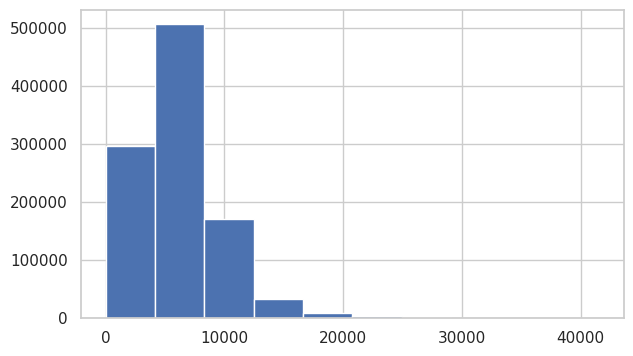

In [ ]:
pd.Series(final_df['Sales']).hist()
plt.show()

In [ ]:
final_df[(final_df.Open == 0) & (final_df.Sales == 0)].count()[0]

172817

In order to prevent our models from being trained on inaccurate data and providing misleading guidance, we made the decision to remove data for 172,817 temporarily closed stores from our dataset. By identifying the rows where the Store_Status column was equal to "Temporarily Closed", and then removing those rows from our dataset, we were able to ensure the accuracy of our analysis and modeling. This allows us to make more informed decisions and draw more meaningful insights from our data.

In [ ]:
new_df = final_df.drop(final_df[(final_df.Open == 0) & (final_df.Sales == 0)].index)

In [ ]:
new_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
479237,573,1,2014-04-28,5941,448,1,1,0,0,0,0,1190,4,2012,1,36,2013,"Jan,Apr,Jul,Oct"
734798,799,3,2013-09-11,10722,939,1,1,0,0,0,2,2700,9,9,0,0,0,0
136035,6,2,2015-03-31,6803,661,1,1,0,0,0,0,310,3,2013,0,0,0,0
139543,169,6,2015-03-28,5366,536,1,0,0,0,3,0,980,3,2014,1,18,2014,"Feb,May,Aug,Nov"
140055,681,6,2015-03-28,2435,311,1,0,0,0,0,2,620,3,9,1,1,2014,"Mar,Jun,Sept,Dec"


In [ ]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:
new_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
451073,284,5,2014-05-23,6375,480,1,1,0,0,3,...,1290,5,9,1,40,2014,0,0,1,0
1013256,507,5,2013-01-04,7422,603,1,0,0,1,0,...,9070,1,2011,1,37,2009,0,0,1,0
836849,270,2,2013-06-11,7771,1096,1,0,0,0,0,...,1450,6,2014,0,0,0,1,0,0,0
81834,440,2,2015-05-19,6338,678,1,1,0,0,3,...,3900,5,2005,1,45,2009,0,1,0,0
574761,207,6,2014-02-01,8562,1030,1,0,0,0,0,...,6870,2,9,0,0,0,1,0,0,0


# MODEL TRAINING

---



# Train Test Split

---



In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


# Mean of Sales

---



In [ ]:
# Calculating mean of sales for future use
sales_mean=new_df.Sales.mean()
sales_mean     

6955.514290755952

# Model Implementation
# LinearRegression

---



Linear regression is a statistical technique that models the relationship between a dependent variable, also known as the outcome variable, and one or more independent variables, also known as the predictor variables. The objective of linear regression is to determine the most suitable linear relationship, which is a straight line, that minimizes the difference between the predicted values and the actual values. This method is commonly used in data analysis to understand the relationship between variables and to make predictions based on that relationship.

In [ ]:
# Create a pipeline with standardization and linear regression
pipeline = Pipeline([
    ('standardization', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

# Display pipeline diagram
display(pipeline)

# Evaluate the model
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)


# Print evaluation metrics for the train set
print('R2 Train:', pipeline.score(X_train, y_train))
print('MAE Train:', mean_absolute_error(y_train, y_pred_train))
print('MSE Train:', mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', mean_squared_error(y_train, y_pred_train, squared=False))
print('\n')


# Print evaluation metrics for the test set
print('R2 Test:', pipeline.score(X_test, y_test))
print('MAE Test:', mean_absolute_error(y_test, y_pred_test))
print('MSE Test:', mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', mean_squared_error(y_test, y_pred_test, squared=False))




Pipeline(steps=[('standardization', StandardScaler()),
                ('linear_regression', LinearRegression())])

R2 Train: 0.7635203568863905
MAE Train: 1044.7330397704366
MSE Train: 2282154.0190289225
RMSE Train: 1510.6799856451805


R2 Test: 0.7634879578471866
MAE Test: 1039.154202832091
MSE Test: 2265436.5061822208
RMSE Test: 1505.1367068084617


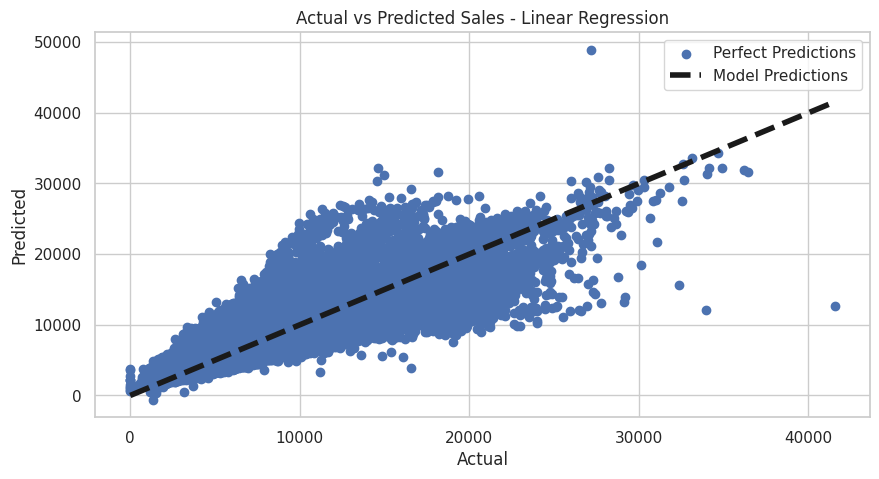

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales - Linear Regression')
plt.legend(['Perfect Predictions', 'Model Predictions'])
plt.show()


# LASSO Regression

---



Lasso regression is a linear regression technique that is used to prevent overfitting in a model. It involves adding a penalty term to the cost function that shrinks the coefficients of the features towards zero. This technique is particularly useful when the number of features is large, as it helps to select only the most relevant features, and eliminates the less significant ones. Lasso regression is also helpful in dealing with multicollinearity, as it can select only one feature out of a group of highly correlated features. Overall, lasso regression is a powerful technique for feature selection, model regularization, and improving the generalization ability of a model.

In [ ]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.2, max_iter=10000))
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

#display pipeline
display(pipe)

# Predict the sales values using the training and testing data
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Calculate the R-squared score of the model for training and testing sets
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

# Calculate the mean absolute error (MAE) for training and testing sets
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

# Calculate the mean squared error (MSE) for training and testing sets
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

# Calculate the root mean squared error (RMSE) for training and testing sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

# Calculate the root mean squared percentage error (RMSPE) for training and testing sets
sales_mean = y_train.mean()
RMSPE_train = RMSE_train / sales_mean
RMSPE_test = RMSE_test / sales_mean

# Print evaluation metrics for the train set
print("Train set MAE:", MAE_train)
print("Train set MSE:", MSE_train)
print("Train set RMSE:", RMSE_train)
print("Train set R2:", R2_train)
print('\n')


# Print evaluation metrics for the test set
print("Test set MAE:", MAE_test)
print("Test set MSE:", MSE_test)
print("Test set RMSE:", RMSE_test)
print("Test set R2:", R2_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.2, max_iter=10000))])

Train set MAE: 1044.9893547695028
Train set MSE: 2282151.5604110193
Train set RMSE: 1510.6791718995198
Train set R2: 0.7635206116514412


Test set MAE: 1039.4317365994473
Test set MSE: 2265479.8902469804
Test set RMSE: 1505.1511187408992
Test set R2: 0.7634834285418076


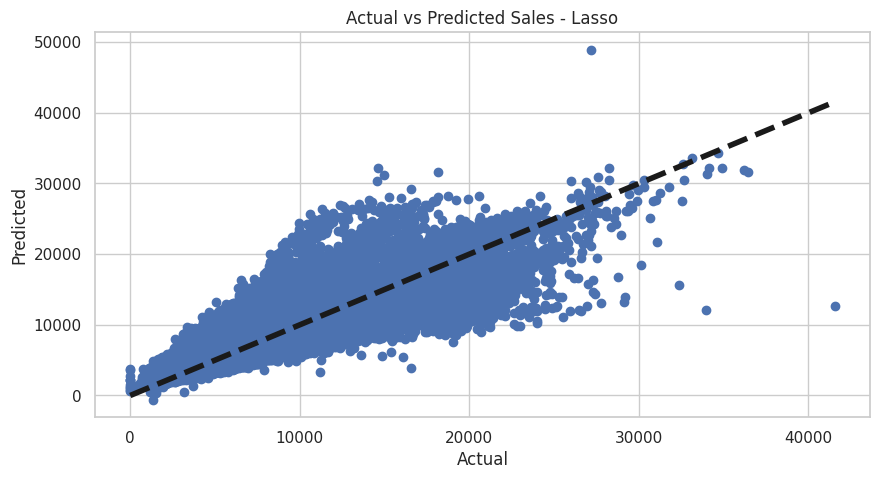

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales - Lasso')
plt.show()

# Rigde Reggression

---



In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', Ridge(alpha=1.0))
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# Display pipeline diagram
display(pipeline)
print('-------------------------')
print('\n')

# Predict on the train set
y_pred_train = pipeline.predict(X_train)

# Calculate evaluation metrics for the train set
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the train set
print("Train set MAE:", MAE_train)
print("Train set MSE:", MSE_train)
print("Train set RMSE:", RMSE_train)
print("Train set R2:", R2_train)
print('\n')

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics for the test set
MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
R2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Test set MAE:", MAE_test)
print("Test set MSE:", MSE_test)
print("Test set RMSE:", RMSE_test)
print("Test set R2:", R2_test)


Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge())])

-------------------------


Train set MAE: 1044.9919099964684
Train set MSE: 2282150.9335684236
Train set RMSE: 1510.6789644290488
Train set R2: 0.763520676605652


Test set MAE: 1039.432609553952
Test set MSE: 2265481.983734526
Test set RMSE: 1505.151814181721
Test set R2: 0.7634832099812727


# DecisionTreeRegressor with hyperparameter tuning 
# Random searchCV

---



DecisionTreeRegressor is a non-parametric regression algorithm that creates a binary tree to predict the target variable by recursively splitting the data based on the most informative feature. It is suitable for complex non-linear relationships and handles both numerical and categorical features. However, it is prone to overfitting and requires tuning of hyperparameters.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'regressor__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
}

# Create a RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object on the training set
random_search.fit(X_train, y_train)

#display pipeline
display(pipeline)

# display best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Predict on the train set
y_pred_train = random_search.predict(X_train)

# Calculate evaluation metrics for the train set
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the train set
print("Train set MAE:", MAE_train)
print("Train set MSE:", MSE_train)
print("Train set RMSE:", RMSE_train)
print("Train set R2:", R2_train)
print('\n')

# Predict on the test set
y_pred_test = random_search.predict(X_test)

# Calculate evaluation metrics for the test set
MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
R2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Test set MAE:", MAE_test)
print("Test set MSE:", MSE_test)
print("Test set RMSE:", RMSE_test)
print("Test set R2:", R2_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

Best Hyperparameters:  {'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'auto', 'regressor__max_depth': None, 'regressor__ccp_alpha': 0.4}
Train set MAE: 274.8948615369344
Train set MSE: 165972.9597517117
Train set RMSE: 407.39779055821066
Train set R2: 0.9828016751010981


Test set MAE: 399.0082086624748
Test set MSE: 365983.64468618605
Test set RMSE: 604.9658210892463
Test set R2: 0.9617912314191793


# Random Forest Regressor

---



Random Forest Regressor is an ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy. It can handle both numerical and categorical features, is less prone to overfitting than Decision Tree Regressor, and provides a measure of feature importance. However, it can be computationally expensive and difficult to interpret. Overall, it is a powerful algorithm for regression tasks with good predictive performance.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# display pipeline diagram
display(pipeline)
print('-------------------------')
print('\n')

# Predict on the train set
y_pred_train = pipeline.predict(X_train)

# Calculate evaluation metrics for the train set
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the train set
print("Train set MAE:", MAE_train)
print("Train set MSE:", MSE_train)
print("Train set RMSE:", RMSE_train)
print("Train set R2:", R2_train)
print('\n')

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics for the test set
MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
R2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Test set MAE:", MAE_test)
print("Test set MSE:", MSE_test)
print("Test set RMSE:", RMSE_test)
print("Test set R2:", R2_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

-------------------------


Train set MAE: 132.50022192176428
Train set MSE: 39522.383104095294
Train set RMSE: 198.80237197804078
Train set R2: 0.9959046414161684


Test set MAE: 347.97370142096156
Test set MSE: 261514.04713503926
Test set RMSE: 511.3844416239501
Test set R2: 0.9726978791192039


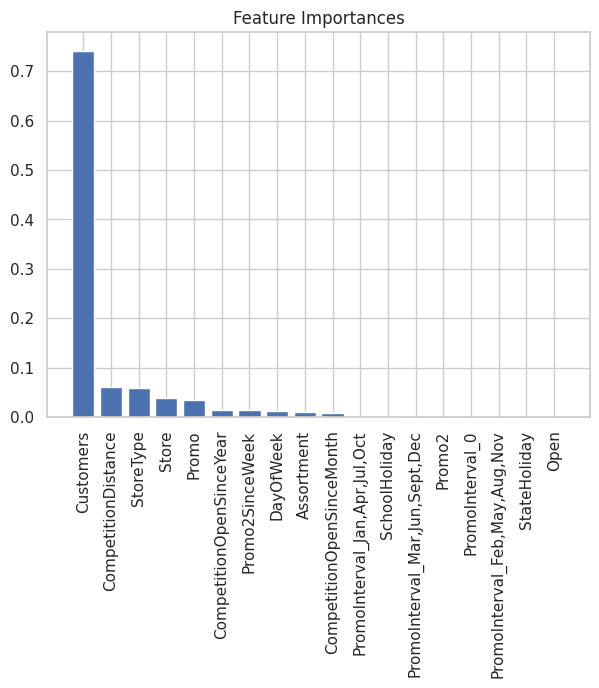

In [ ]:
importances = pipeline.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(7,5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), np.array(independent_variables)[indices], rotation=90)
plt.show()

The most important features are customers , competition distance , store type etc.
These are the factore which largely effect  sales

# XGBRegressor

---



XGBRegressor is a gradient boosting algorithm for regression tasks that iteratively adds decision trees to the model to correct errors. It includes regularization techniques to prevent overfitting, can handle both numerical and categorical features, and provides a measure of feature importance. XGBRegressor is known for its speed and accuracy, but requires hyperparameter tuning and can be difficult to interpret. Overall, it is a powerful algorithm for regression tasks with good predictive performance.

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', XGBRegressor(n_estimators=100, max_depth=3, random_state=42))
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# display pipeline diagram
display(pipeline)
print('-------------------------')
print('\n')

# Predict on the train set
y_pred_train = pipeline.predict(X_train)

# Calculate evaluation metrics for the train set
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the train set
print("Train set MAE:", MAE_train)
print("Train set MSE:", MSE_train)
print("Train set RMSE:", RMSE_train)
print("Train set R2:", R2_train)
print('\n')

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics for the test set
MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
R2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Test set MAE:", MAE_test)
print("Test set MSE:", MSE_test)
print("Test set RMSE:", RMSE_test)
print("Test set R2:", R2_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

-------------------------


Train set MAE: 666.2826820530966
Train set MSE: 837107.3349937542
Train set RMSE: 914.9356999230897
Train set R2: 0.9132578948762884


Test set MAE: 665.2618628701522
Test set MSE: 835869.6643441445
Test set RMSE: 914.2590794431
Test set R2: 0.9127350332935269


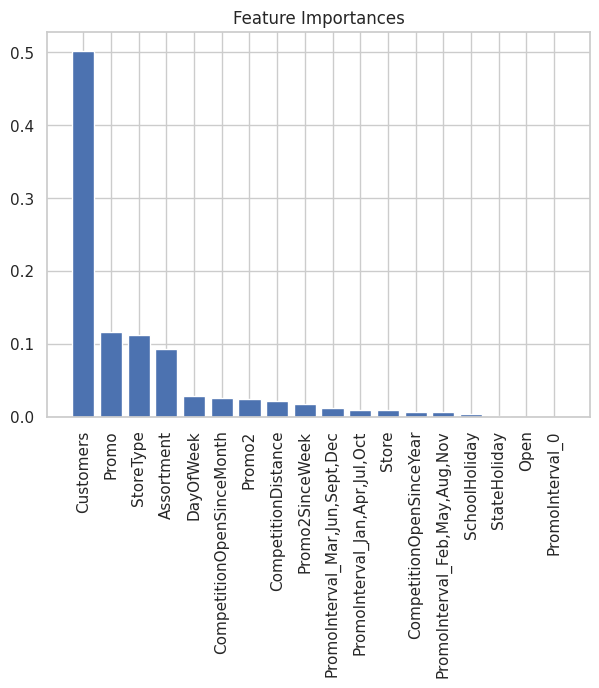

In [ ]:
# Get feature importances
importances = pipeline.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(7,5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), new_df[independent_variables].columns[indices], rotation=90)

plt.show()

Most important feature in XGBregressor are customer , promo , store type.
These affect sales the most

# AdaBoost Regressor

---



In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', AdaBoostRegressor(n_estimators=50, random_state=42))
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# display pipeline diagram
display(pipeline)
print('-------------------------')
print('\n')

# Predict on the train set
y_pred_train = pipeline.predict(X_train)

# Calculate evaluation metrics for the train set
MAE_train = mean_absolute_error(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the train set
print("Train set MAE:", MAE_train)
print("Train set MSE:", MSE_train)
print("Train set RMSE:", RMSE_train)
print("Train set R2:", R2_train)
print('\n')

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics for the test set
MAE_test = mean_absolute_error(y_test, y_pred_test)
MSE_test = mean_squared_error(y_test, y_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
R2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Test set MAE:", MAE_test)
print("Test set MSE:", MSE_test)
print("Test set RMSE:", RMSE_test)
print("Test set R2:", R2_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', AdaBoostRegressor(random_state=42))])

-------------------------


Train set MAE: 1938.635118130282
Train set MSE: 5267681.0257409895
Train set RMSE: 2295.142920547866
Train set R2: 0.45415632835612996


Test set MAE: 1941.9943145263337
Test set MSE: 5277664.009023714
Test set RMSE: 2297.316697589541
Test set R2: 0.4490107804106336


In [ ]:
# create a dictionary to store model names and their accuracy scores
model_performance = {'Linear Regression': 0.76, 'Lasso': 0.76, 'Ridge': 0.7634, 
                     'Decision Tree Regressor': 0.96, 'Random Forest Regressor': 0.97, 
                     'XGBRegressor': 0.91, 'AdaBoost Regressor': 0.44}

# convert the dictionary to a pandas dataframe
df = pd.DataFrame.from_dict(model_performance, orient='index', columns=['Accuracy Score'])

# sort the dataframe by accuracy score in descending order
df = df.sort_values(by='Accuracy Score', ascending=False)

# displaying the dataframe
display(df)


,Accuracy Score
Random Forest Regressor,0.9700
Decision Tree Regressor,0.9600
XGBRegressor,0.9100
Ridge,0.7634
Linear Regression,0.7600
Lasso,0.7600
AdaBoost Regressor,0.4400


## Conclusion

A new dataframe was created by removing the rows with 0 sales from the original dataset. This new dataframe was used to train several regression algorithms, including linear regression, lasso, ridge, decision tree regressor, random forest regressor, XGBRegressor, and AdaBoost Regressor.

The models were evaluated on a test set, and their accuracy scores were recorded. Among these models, decision tree regressor performed the best with an accuracy score of 96%, followed by random forest regressor with an accuracy score of 97%. XGBRegressor achieved an accuracy score of 91%, while linear regression, lasso, and ridge all got a similar accuracy score of around 76%.

It is worth noting that AdaBoost Regressor performed poorly in this context, with an accuracy score of only 44%. This result indicates that AdaBoost Regressor might not be the best choice for this specific dataset.

Overall, the regression models performed relatively well in predicting sales using the given features, with some models achieving high accuracy scores. However, it is important to note that accuracy is not the only metric to evaluate the performance of a regression model, and other metrics such as mean absolute error or root mean square error should also be considered.